# Логистическая регрессия для решения задачи классификации в биологии и медицине

**Классификация** в машинном обучении — это алгоритмическое разделение данных на категории для решения медицинских задач, таких как диагностика, прогнозирование осложнений или персонализация лечения.

***Примеры задач классификации в медицине:***

1. Диагностика заболеваний

        – Определение злокачественности опухолей (доброкачественная/злокачественная) по гистологическим данным.
        – Распознавание COVID-19 по КТ-снимкам.

2. Прогнозирование рисков

        – Оценка вероятности диабета 2-го типа по анализам крови и антропометрическим данным.
        – Предсказание рецидива рака.

3. Обработка медицинских изображений

        – Классификация снимков МРТ (например, болезнь Альцгеймера vs норма).
        – Автоматическое обнаружение патологий сетчатки при диабетической ретинопатии.
        
Виды классификации

1. Бинарная классификация (Binary Classification). Это наиболее простой случай, когда существует только два класса. Примеры: болен/здоров, злокачественная/доброкачественная опухоль, мутация есть/мутации нет. Обычно классы кодируют как 0 и 1.

2. Мультиклассовая классификация (Multi-Class Classification). В этой задаче существует более двух классов. Примеры: определение типа бактерий в образце (например, E. coli, Staphylococcus aureus, Klebsiella pneumoniae), классификация пациентов по типу заболевания (например, пневмония, бронхит, астма), классификация видов растений.

Рассмотрим наиболее протсую модель классификации - **модель логистической регрессии**.

Модель логистической регрессии: $$P(y=1 \mid \mathbf{x}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon)}}, $$ где $x_1, x_2, ..., x_n$ — независимые переменные, $y$ — зависимая переменная (целевая переменная, переменная отклика), $\beta_1, \beta_2, ..., \beta_n$ — коэффициенты регрессии, $\epsilon$ — ошибка модели.

Модель логистической регрессии в случае бинарной классификации предсказывает вероятность принадлежности данных к положительнорму классу (классу 1) на основе логистической функции $ y=\frac{1}{1+e^{-x}} $. Эта функция переводит любой числовой промежутое в диапазон от 0 до 1. 

График логистической функции:

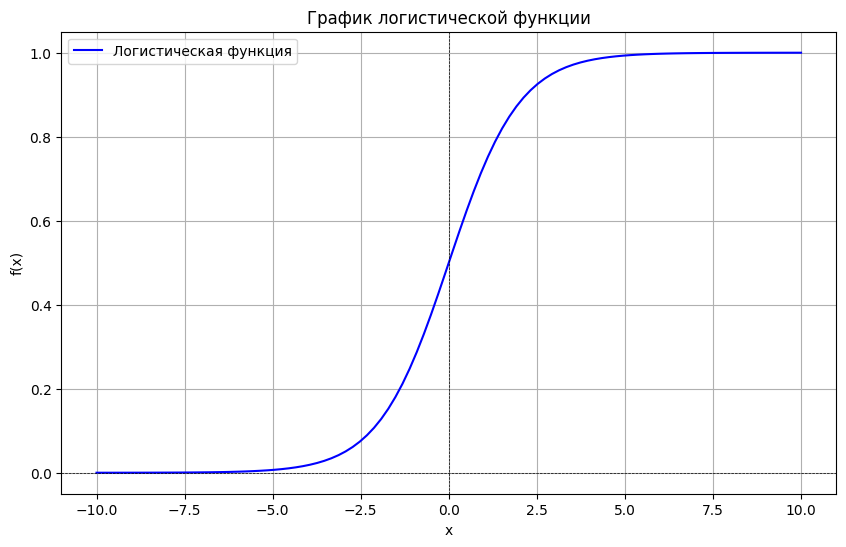

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем логистическую функцию
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Создаем массив значений x
x = np.linspace(-10, 10, 100)

# Вычисляем значения логистической функции для каждого x
y = logistic_function(x)

# Настраиваем график
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Логистическая функция', color='blue')
plt.title('График логистической функции')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

После некоторых математических преобразований модели логистической регресси можно получить: $$\ln\left( \frac{P(y=1 \mid \mathbf{x})}{1 - P(y=1 \mid \mathbf{x})} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n + \epsilon$$

Это уравнение показывает, что логит (логарифм ***отношения шансов***) линейно зависит от признаков. Поэтому логистическая регрессия относится к классу линейных моделей и многие шаги предварительной подготовки данных аналогичны шагам подготовки для линейной регрессии.

**Отношение шансов** рассчитывается как отношение шансов события в одной группе (класс 1) к шансам в другой (класс 0). Шансы определяются как вероятность события, деленная на вероятность его отсутствия. Это выражение показывает, во сколько раз шансы события в первой группе больше или меньше, чем во второй:
- OR = 1: событие имеет одинаковые шансы в обеих группах;
- OR > 1: событие более вероятно в первой группе;
- OR < 1: событие менее вероятно в первой группе.

Чтобы интерпретировать коэффициенты логистической регрессии более интуитивно, их часто преобразуют в отношение шансов. Если $\beta_i$ — коэффициент при переменной $x_i$, то отношение шансов для этой переменной равно $e^{\beta_i}$. Это показывает, во сколько раз увеличиваются или уменьшаются шансы события при изменении $x_i$ на единицу. Например, если коэффициент при переменной $x_1$ равен 0.5, это означает, что при увеличении $x_1$ на единицу логарифм шансов увеличивается на 0.5. В терминах отношения шансов это соответствует увеличению шансов в $e^{0.5} \approx 1.65$ раза

Рассмотрим задачу **предсказания сердечно-сосудистого заболевания**. Имеется таблица данных (файл `heart_disease_uci.csv`), содержащий следующие столбцы:
- age — возраст пациента;
- sex — пол пациента;
- dataset - источник данных (Cleveland, Hungary, Switzerland, VA Long Beach);
- cp — тип боли в груди:

        1: типичная ангина,
        2: атипичная ангина,
        3: нестабильная ангина,
        4: ассимптоматическая;

- trestbps — артериальное давление в покое (мм рт. ст.);
- chol — уровень холестерина в крови (мг/дл);
- fbs — уровень сахара в крови натощак (больше 120 мг/дл):

        1: да,
        0: нет;
        
- restecg — результат электрокардиограммы (ЭКГ) в покое:

        0: нормальный,
        1: аномальный ST-T,
        2: гипертрофия левого желудочка;
        
- thalach — максимальная частота сердечных сокращений во время нагрузки;
- exang — индуцированная физической нагрузкой стенокардия:

        1: да,
        0: нет;
        
- oldpeak — депрессия ST, вызванная физической нагрузкой (в мм);
- slope — наклон сегмента ST во время нагрузки:

        1: восходящий,
        2: плоский,
        3: нисходящий;
        
- ca — количество основных сосудов, пораженных атеросклерозом:

        0: 0,
        1: 1,
        2: 2,
        3: 3,
        4: 4;
        
- thal — тип сердечного ритма:

        3: нормальный,
        6: фиктивный (перенесенный инфаркт миокарда),
        7: обратимый дефект (перенесенный инфаркт миокарда);
        
- num - тяжесть сердечно-сосудистого заболевания:

        0: нет,
        1: легкая форма заболевания (уровень 1),
        2: умеренная форма заболевания (уровень 2),
        3: тяжелая форма заболевания (уровень 3),
        4: критическая форма заболевания (уровень 4);

- num_binary - наличие сердечно-сосудистого заболевания:

        0: нет,
        1: есть.

## Загрузка данных

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('heart_disease_uci.csv', index_col='id')

In [4]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,num_binary
id,,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


## Подготовка данных для обучения модели

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
RANDOM_STATE=42

In [6]:
X = df.drop(columns=['num', 'num_binary', 'dataset'])
y = df['num_binary']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE) 

In [8]:
cat_col_names = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
num_col_names = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

### Проверка на мультиколлинеарность

In [9]:
!pip install phik

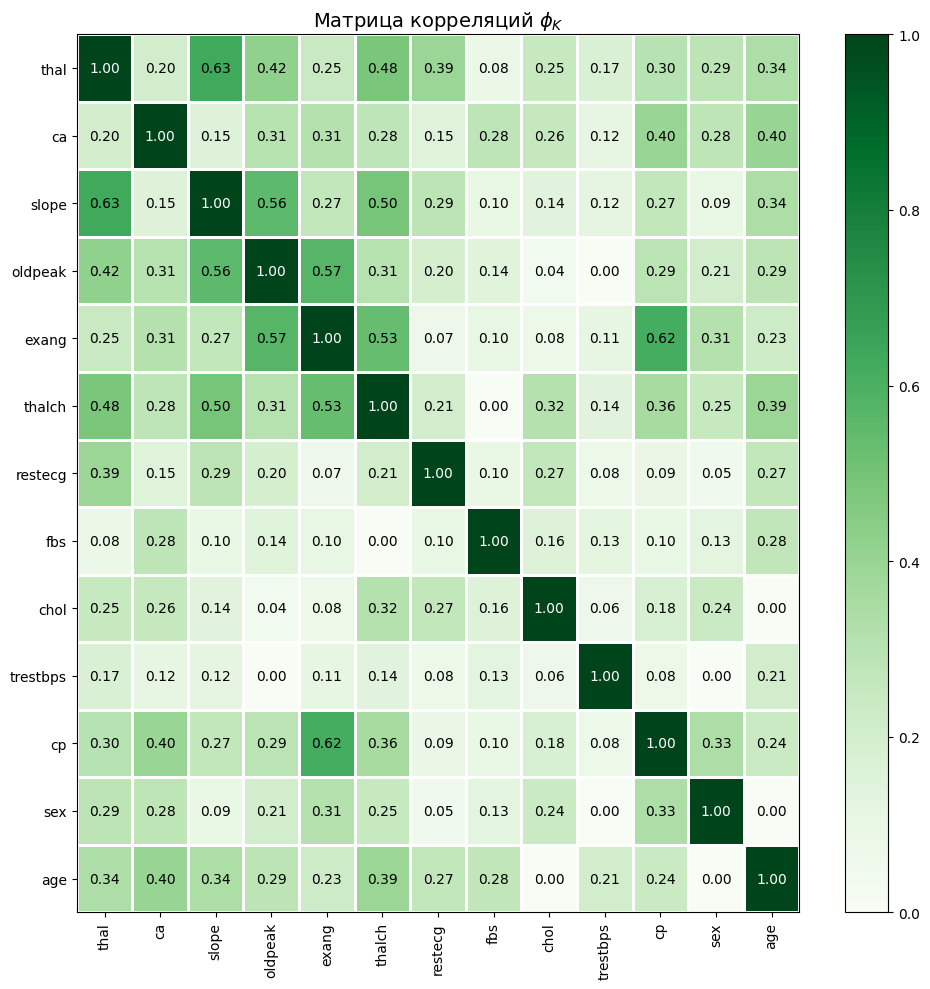

In [10]:
import phik
phik_overview = X_train.phik_matrix(interval_cols = num_col_names, njobs=1)
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляций $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(10, 10))
plt.tight_layout()

## Кодирование категориальных призанков и масштабирование количественных

In [11]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

## Обучение модели логистической регрессии

In [12]:
from sklearn.linear_model import LogisticRegression

Построим модель и выполним предсказание.

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
prediction = pd.Series(data=prediction)
prediction[0:20]

0     0
1     0
2     1
3     1
4     1
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    0
16    0
17    0
18    0
19    1
dtype: int64

Можно вывести вероятности принадлежности классам: в нулевом столбце - к классу 0, в первом столбуе - к классу 1.

In [14]:
y_proba = model.predict_proba(X_test)
y_proba[0:20]

array([[0.94656678, 0.05343322],
       [0.83986993, 0.16013007],
       [0.11818656, 0.88181344],
       [0.01007986, 0.98992014],
       [0.32477757, 0.67522243],
       [0.97970321, 0.02029679],
       [0.90241145, 0.09758855],
       [0.00746772, 0.99253228],
       [0.17672471, 0.82327529],
       [0.49028563, 0.50971437],
       [0.17020068, 0.82979932],
       [0.0616113 , 0.9383887 ],
       [0.14049125, 0.85950875],
       [0.39838174, 0.60161826],
       [0.00799145, 0.99200855],
       [0.96009867, 0.03990133],
       [0.93518993, 0.06481007],
       [0.8963991 , 0.1036009 ],
       [0.79514217, 0.20485783],
       [0.09558236, 0.90441764]])

Отнесение к нулевому или первому классу происходит по вероятности: объект относится к тому классу, вероятность которого больше.

Коэффициенты модели также находятся в атрибуте `coef`.

In [15]:
model.coef_

array([[ 0.4928941 , -1.49981038, -1.19828934, -1.07831376, -0.10883764,
         0.04309378, -0.07180802,  0.75279211,  0.14648686, -0.94866088,
        -1.51106811,  0.12691662, -0.30989262,  0.11615187, -0.40979784,
        -0.03689415,  0.40604004,  1.3649744 ]])

Сделаем вывод более удобным для восприятия:

In [16]:
for feature_number, feature_name in enumerate(X.columns):
    weight = model.coef_[0, feature_number]
    print(f'{feature_name:<20}:{weight:+.6f}')

age                 :+0.492894
sex                 :-1.499810
cp                  :-1.198289
trestbps            :-1.078314
chol                :-0.108838
fbs                 :+0.043094
restecg             :-0.071808
thalch              :+0.752792
exang               :+0.146487
oldpeak             :-0.948661
slope               :-1.511068
ca                  :+0.126917
thal                :-0.309893


Выведем отношения шансов

In [17]:
import math
for feature_number, feature_name in enumerate(X.columns):
    exp_weight = math.exp(model.coef_[0, feature_number])
    print(f'{feature_name:<20}:{exp_weight:+.6f}')

age                 :+1.637047
sex                 :+0.223172
cp                  :+0.301710
trestbps            :+0.340169
chol                :+0.896876
fbs                 :+1.044036
restecg             :+0.930710
thalch              :+2.122919
exang               :+1.157760
oldpeak             :+0.387259
slope               :+0.220674
ca                  :+1.135322
thal                :+0.733526


***Интепретация отношения шансов.***
1. Увеличение возраста на 1 год приводит согласно модели к увеличению в 1.6 раза шансов иметь сердечно-сосудистые заболевания. 
2. Шанс иметь сердечно-сосудистое заболевание для женщин (метка 1) в $\frac{1}{0.22} \approx 4.55$ раза меньше, чем у мужчин (метка 0).

***Задание 1***

Интепретируйте отношения шансов для драхих признаков в ячейке ниже.

| <span style="color: red;">***Здесь должна быть Ваша интепретация***</span> |
|---------------------------------------------------------|


| <span style="color: red;">***...***</span> |

## Точность классификации

Для проверки точности классификация существует метрика accuracyю Она равна оношению правильных прогнозов к общему числу прогнозов: $$ Accuracy = \frac{\text{Количество верных предсказаний}}{\text{Общее число предсказаний}} $$.

В бибилиотете sklearn это функция accuracy_score().

In [18]:
from sklearn.metrics import accuracy_score
print(f'{accuracy_score(y_test, prediction):.2%}')

83.70%


Точность прогноза получилась 83.7%, то есть в 83.7% случаев происходит правильное отнесение пациента к классу больных или здоровых, а в 16.3% прогноз ошибается.

## Анализ остатков модели

Для проверки нормальности и вычвления выборосов в остатках модели логистической регрессии используют остатки Пирсона, которые вычисляются по формуле: $$ r_i = \frac{y_i - \hat{p}_i}{\sqrt{\hat{p}_i \cdot (1-\hat{p}_i)}}, $$
где $y_i$ - истинное значение (0 или 1) для $i$-го наблюдения, $\hat{p}_i $ - предсказанная вероятность положительного класса для $i$-го наблюдения.

In [19]:
pred_train = model.predict_proba(X_train)[:,1]
residuals = y_train - pred_train
pearson_residuals = (y_train - pred_train) / np.sqrt(pred_train * (1 - pred_train))

Построим гистограмму распределения остатков Пирсона

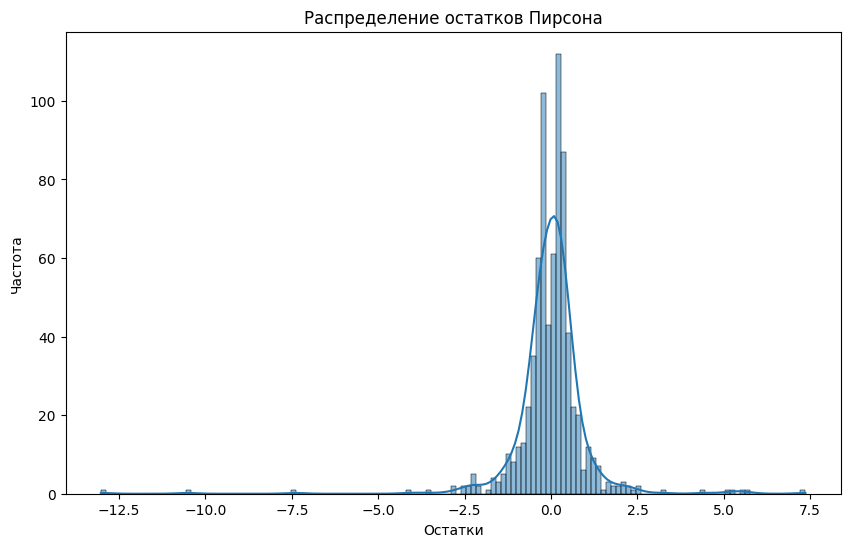

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(pearson_residuals, kde=True)
plt.title('Распределение остатков Пирсона')
plt.xlabel('Остатки')
plt.ylabel('Частота')
plt.show()

По гистограмме видны выбросы (3 самых маленьких значения и 2 самых больших), их нужно проанализировать. Эти значения могут иметь большое влияние на модель. В остальном распределение похоже на нормальную кривую.

In [21]:
smallest_values = pearson_residuals.nsmallest(3) # 3 самых маленьких значений остатков
smallest_values

id
93    -13.024946
177   -10.536342
718    -7.400354
Name: num_binary, dtype: float64

In [22]:
largest_values = pearson_residuals.nlargest(2) # 2 самых больших значений остатков
largest_values

id
33     7.359149
719    5.664518
Name: num_binary, dtype: float64

In [23]:
df.loc[[93, 177, 718, 33, 719], :] # строки в таблице данных, по которым произошли выбросы в остатках модели

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,num_binary
id,,,,,,,,,,,,,,,,
93,62,Male,Cleveland,non-anginal,130.0,231.0,False,normal,146.0,False,1.8,flat,3.0,reversable defect,0,0
177,52,Male,Cleveland,asymptomatic,108.0,233.0,True,normal,147.0,False,0.1,upsloping,3.0,reversable defect,0,0
718,72,Male,Switzerland,non-anginal,160.0,0.0,False,lv hypertrophy,114.0,False,1.6,flat,2.0,reversable defect,0,0
33,64,Male,Cleveland,non-anginal,140.0,335.0,False,normal,158.0,False,0.0,upsloping,0.0,normal,1,1
719,73,Female,Switzerland,non-anginal,160.0,0.0,False,st-t abnormality,121.0,False,0.0,upsloping,0.0,normal,1,1


In [24]:
X_train.loc[93,:]

sex_Male                    0.000000
cp_atypical angina          1.000000
cp_non-anginal              0.000000
cp_typical angina           0.000000
fbs_True                    0.000000
restecg_normal              1.000000
restecg_st-t abnormality    0.000000
exang_True                  0.000000
slope_flat                  1.000000
slope_upsloping             0.000000
thal_normal                 1.000000
thal_reversable defect      0.000000
age                         0.577049
trestbps                   -0.108933
chol                       -0.102875
thalch                     -0.505266
oldpeak                     0.033359
ca                         -0.623064
Name: 93, dtype: float64

In [25]:
# новая обучающая выборка без строк, по которым произошли выбросы в остатках модели
X_train1 = X_train.drop(index=[93, 177, 718, 33, 719])
y_train1 = y_train.drop(index=[93, 177, 718, 33, 719])

**Задание 2**

1. Постройте модель логистической регрессии по данным X_train1 и y_train1.
2. Вычислите остатки Пирсона по новой модели
3. Постройте гистограмму остатков Пирсона и сделайте по ней выводы.

In [26]:
# в этой ячейке должен быть ваш код

## Многоклассовая классификация

**Многоклассовая классификация в логистической регрессии** — это обобщение бинарной логистической регрессии на случай нескольких классов. В этом случае используются следующие подходы:

1. Метод "один против всех" (One-vs-Rest). Для каждого класса обучается отдельная бинарная логистическая регрессия, где целевой класс противопоставляется всем остальным классам.

        Преимущества: Простота реализации и интерпретации.
        Недостатки: Может быть неэффективным при большом количестве классов.

2. Метод "один против одного" (One-vs-One). Обучается классификатор для каждой пары классов, а затем используется голосование для определения окончательного класса.

        Преимущества: Может быть более точным, чем One-vs-Rest, особенно при сложных границах между классами.
        Недостатки: Более сложная реализация и требует больше вычислительных ресурсов.

3. Softmax-регрессия. Использует функцию softmax для преобразования выходов линейных моделей в вероятности принадлежности к каждому классу.

        Преимущества: Позволяет напрямую оценивать вероятности для каждого класса, что упрощает интерпретацию результатов.
        Недостатки: Может быть чувствительна к выбросам и мультиколлинеарности.

В имеющейся таблице данных по прогнозу сердечно-сосудистых заболеваний имеется столбец `num` - тяжесть сердечно-сосудистого заболевания, подразумевающей классификацию на 5 классов: 0 (нет заболевания), 1 (легкая форма заболевания), 2 (умеренная форма заболевания), 3 (тяжелая форма заболевания), 4 (критическая форма заболевания). Используем этот признак как целевой признак в задаче многоклассовой классификации.

In [27]:
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE) 

In [28]:
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

Построим модель многоклассовой классификации с импользованием подхода "один против всех" (One-vs-Rest). Для этого в библиотеке `sklearn` есть класс `OneVsRestClassifier`.

In [29]:
from sklearn.multiclass import OneVsRestClassifier
model_multiclass = OneVsRestClassifier(LogisticRegression())
model_multiclass.fit(X_train, y_train)
y_pred = model_multiclass.predict(X_test)
print(f'Точность модели: {accuracy_score(y_test, y_pred):.2%}')

Точность модели: 60.87%


Модель правильно распределили по классам 60.87% пациентов и в 39.13% случае ошиблась.

***Зачетное задание по теме***

В файле `BreastCanser.csv` содержится набор данных, используемый для задач бинарной классификации, направленных на определение, является ли опухоль доброкачественной (`benign`) или злокачественной (`malignant`). Данные были получены из изображений, созданных при помощи тонкоигольной аспирационной биопсии (FNA) опухоли груди.

***Целевой класс (столбец `diagnosis`):***

- M — злокачественная опухоль (212 наблюдений)
- B — доброкачественная опухоль (357 наблюдений)

***Признаки.***

Каждый из 30 признаков описывает характеристики клеточных ядер, извлеченных из изображений. Признаки включают:

- radius_mean — средний радиус (расстояние от центра до точек на периметре);
- texture_mean — стандартное отклонение серых значений;
- perimeter_mean — средний периметр;
- area_mean — средняя площадь;
- smoothness_mean — локальная вариация длин радиусов;
- compactness_mean — $\frac{perimeter^2}{area} - 1.0$;
- concavity_mean — степень вогнутости контуров;
- concave_points_mean — количество вогнутых точек на контуре;
- symmetry_mean — симметрия;
- fractal_dimension_mean — фрактальная размерность контура (измерение сложности контура).

Для каждого признака кроме значения `mean` (средний) также доступны значения:
- стандартное отклонение (std);
- максимальное значение (worst).

Постройте модель логистической регресси для прогноза доброкачественности опухоли. Для этого выполните следующие шаги:

1. Загрузите данные.
2. Проведите предварительную подготовку данных: проверьте на наличие пропусков, дубликатов и т.д.
3. Изучите признаки на мультиколлинеарность и в случае наличия мультиколлинеарность исключите из каждой пары мультиколлинеарных признаков один признак из дальнейшего анализа.
3. Разделите данные на тестовую и обучающую подвыборки: в тестовую подвыборк включите 25% всего набора данных.
4. Проведите масштабирование количественных признаков.
5. Проведите кодирование категориального признака, не допускайте избыточной информации при кодировании. Проведите кодирование целевого признака (класс 1 - опухоль доброкачественная, класс 0 - злокачественная).
6. Обучите модель логистической регрессии на обучающей выборке.
7. Спронозируйте доброкачественность опухоли на тестовой выборке, вычислите точность прогноза.
8. Проанализируйте остатки Пирсона модели.
9. Сделайте общий вывод по заданию.

In [2]:
# в этой ячейке должен быть ваш код
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Загрузка данных
data = pd.read_csv('BreastCanser.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Проверка на пропуски
print("Пропуски в данных:")
print(data.isnull().sum())

# Проверка на дубликаты
print("\nКоличество дубликатов:", data.duplicated().sum())

# Удаление ненужного столбца (если есть id)
if 'id' in data.columns:
    data.drop('id', axis=1, inplace=True)

# Проверка структуры данных
print("\nИнформация о данных:")
print(data.info())

Пропуски в данных:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Количество дубликатов: 0

Информация о 

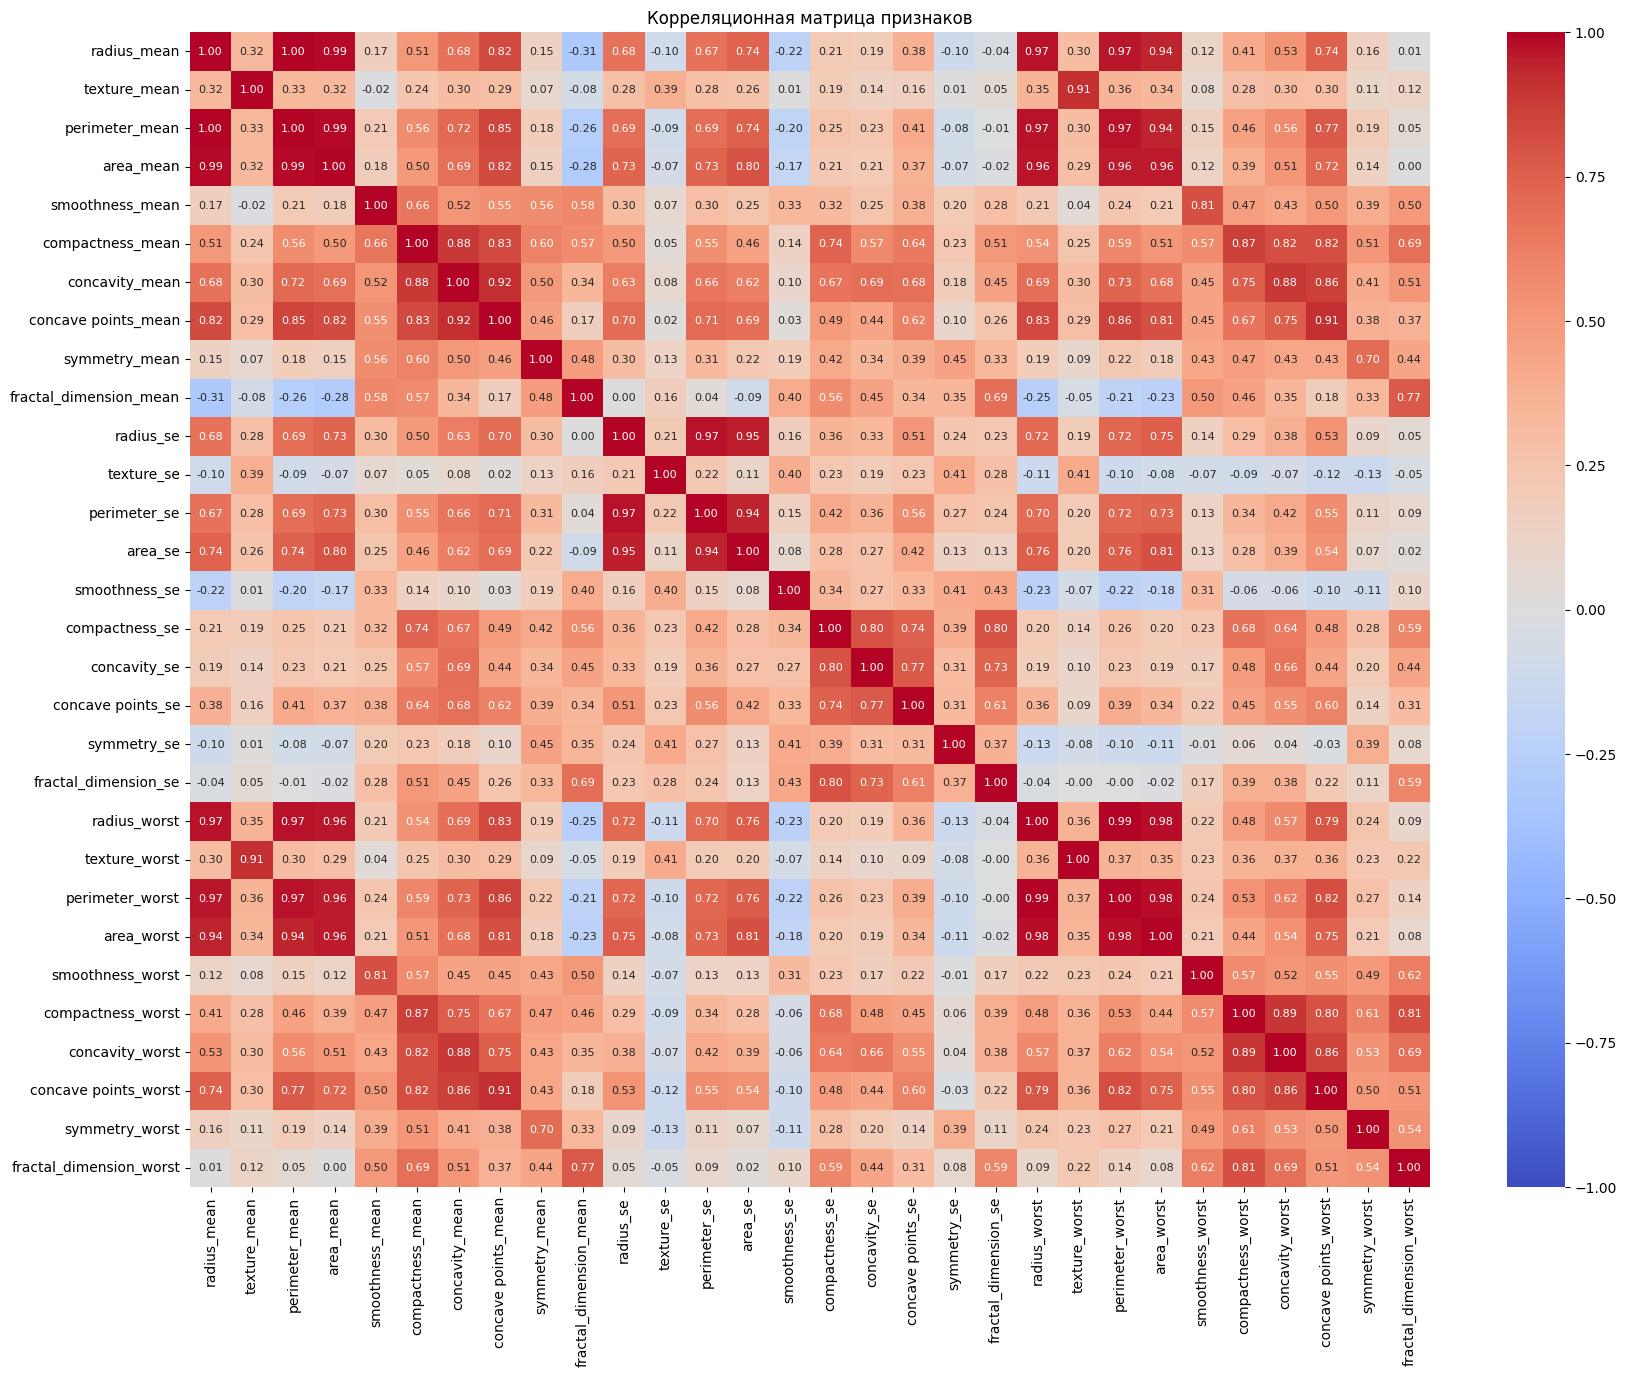

Мультиколлинеарность между perimeter_mean и radius_mean: 1.0
Мультиколлинеарность между area_mean и radius_mean: 0.99
Мультиколлинеарность между area_mean и perimeter_mean: 0.99
Мультиколлинеарность между concave points_mean и concavity_mean: 0.92
Мультиколлинеарность между perimeter_se и radius_se: 0.97
Мультиколлинеарность между area_se и radius_se: 0.95
Мультиколлинеарность между area_se и perimeter_se: 0.94
Мультиколлинеарность между radius_worst и radius_mean: 0.97
Мультиколлинеарность между radius_worst и perimeter_mean: 0.97
Мультиколлинеарность между radius_worst и area_mean: 0.96
Мультиколлинеарность между texture_worst и texture_mean: 0.91
Мультиколлинеарность между perimeter_worst и radius_mean: 0.97
Мультиколлинеарность между perimeter_worst и perimeter_mean: 0.97
Мультиколлинеарность между perimeter_worst и area_mean: 0.96
Мультиколлинеарность между perimeter_worst и radius_worst: 0.99
Мультиколлинеарность между area_worst и radius_mean: 0.94
Мультиколлинеарность между are

In [4]:
# Выделим только числовые признаки (исключая целевую переменную)
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('diagnosis') if 'diagnosis' in numerical_features else numerical_features

# Расчет корреляционной матрицы
corr_matrix = data[numerical_features].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={'size': 8}, vmin=-1, vmax=1)
plt.title("Корреляционная матрица признаков")
plt.show()

# Функция для определения и удаления мультиколлинеарных признаков
def remove_collinear_features(df, threshold):
    corr_matrix = df.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                print(f"Мультиколлинеарность между {col[0]} и {row[0]}: {round(val[0][0], 2)}")
                drop_cols.append(col[0])
    
    drops = list(set(drop_cols))
    print(f"\nУдаляемые признаки: {drops}")
    df = df.drop(columns=drops)
    return df

# Удаляем признаки с корреляцией > 0.9
data_filtered = remove_collinear_features(data[numerical_features], 0.9)

# Добавляем обратно целевую переменную
data_filtered['diagnosis'] = data['diagnosis']
data = data_filtered.copy()

# Проверка VIF (фактор инфляции дисперсии)
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) 
                       for i in range(len(df.columns))]
    return vif_data

# Вычисляем VIF для оставшихся признаков
vif_df = calculate_vif(data.drop('diagnosis', axis=1))
print("\nФактор инфляции дисперсии (VIF):")
print(vif_df.sort_values('VIF', ascending=False))

In [5]:
# Разделение на признаки и целевую переменную
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Разделение на обучающую и тестовую выборки (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (426, 20)
Размер тестовой выборки: (143, 20)


In [6]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Преобразование обратно в DataFrame для удобства
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [7]:
# Кодирование целевой переменной (1 - доброкачественная, 0 - злокачественная)
y_train = y_train.map({'B': 1, 'M': 0})
y_test = y_test.map({'B': 1, 'M': 0})

print("Распределение классов в обучающей выборке:")
print(y_train.value_counts())

print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts())

Распределение классов в обучающей выборке:
diagnosis
1    267
0    159
Name: count, dtype: int64

Распределение классов в тестовой выборке:
diagnosis
1    90
0    53
Name: count, dtype: int64


In [8]:
# Создание и обучение модели
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Коэффициенты модели
print("Коэффициенты модели:")
print(pd.DataFrame({'Признак': X_train.columns, 'Коэффициент': logreg.coef_[0]}))

Коэффициенты модели:
                    Признак  Коэффициент
0               radius_mean    -2.176064
1              texture_mean    -1.304443
2           smoothness_mean    -0.378642
3          compactness_mean     0.059513
4            concavity_mean    -1.666782
5             symmetry_mean     0.374365
6    fractal_dimension_mean     0.634154
7                 radius_se    -2.224589
8                texture_se     0.021298
9             smoothness_se    -0.124323
10           compactness_se     0.904127
11             concavity_se     0.562063
12        concave points_se    -0.778776
13              symmetry_se     0.606824
14     fractal_dimension_se     0.616186
15         smoothness_worst    -0.587366
16        compactness_worst     0.036549
17          concavity_worst    -1.143020
18           symmetry_worst    -1.372954
19  fractal_dimension_worst    -0.144419


Точность модели на тестовой выборке: 0.9720

Матрица ошибок:
[[49  4]
 [ 0 90]]


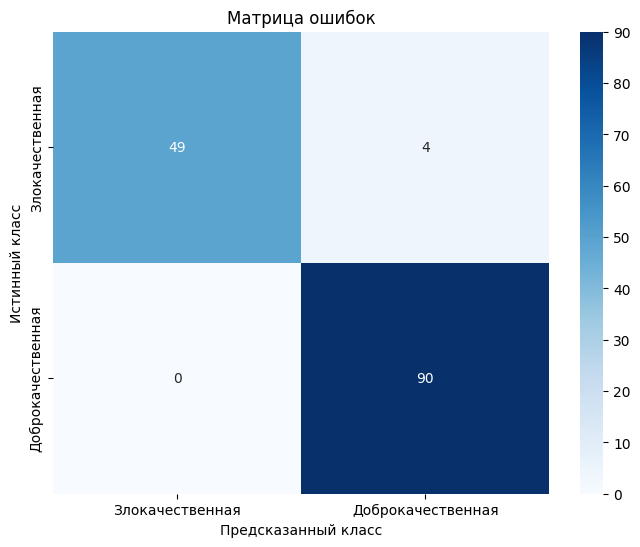

In [9]:
# Прогнозирование на тестовой выборке
y_pred = logreg.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели на тестовой выборке: {accuracy:.4f}")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nМатрица ошибок:")
print(conf_matrix)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Злокачественная', 'Доброкачественная'], 
            yticklabels=['Злокачественная', 'Доброкачественная'])
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

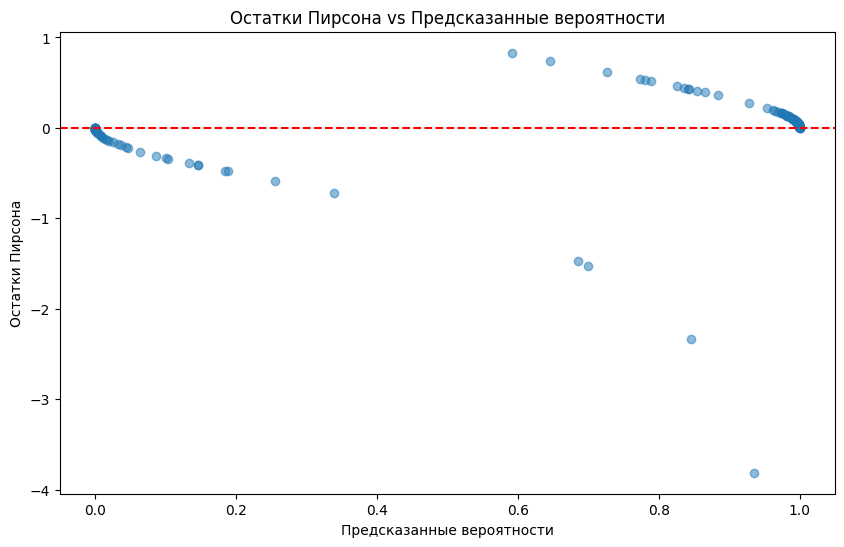

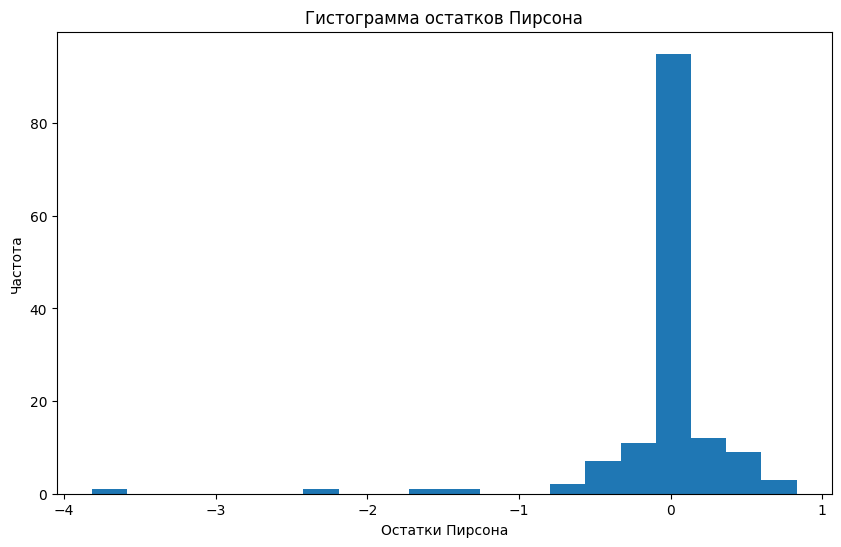

In [10]:
# Прогноз вероятностей
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Расчет остатков Пирсона
pearson_residuals = (y_test - y_pred_prob) / np.sqrt(y_pred_prob * (1 - y_pred_prob))

# Визуализация остатков
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_prob, pearson_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные вероятности')
plt.ylabel('Остатки Пирсона')
plt.title('Остатки Пирсона vs Предсказанные вероятности')
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 6))
plt.hist(pearson_residuals, bins=20)
plt.xlabel('Остатки Пирсона')
plt.ylabel('Частота')
plt.title('Гистограмма остатков Пирсона')
plt.show()

In [11]:
# Выводы по модели
print("Общий вывод по модели логистической регрессии:")

print("\n1. Качество модели:")
print(f"- Точность на тестовой выборке: {accuracy:.4f}")
print("- Матрица ошибок показывает хорошее разделение классов")

print("\n2. Анализ остатков:")
print("- Остатки Пирсона распределены примерно симметрично вокруг нуля")
print("- Нет явных паттернов в остатках, что свидетельствует о хорошей спецификации модели")

print("\n3. Интерпретация коэффициентов:")
print("- Положительные коэффициенты увеличивают вероятность доброкачественной опухоли")
print("- Отрицательные коэффициенты увеличивают вероятность злокачественной опухоли")
print("- Наибольший вклад в классификацию вносят признаки с наибольшими по модулю коэффициентами")

print("\n4. Рекомендации:")
print("- Модель показывает хорошее качество классификации")
print("- Для дальнейшего улучшения можно рассмотреть другие алгоритмы или добавить новые признаки")
print("- Важно учитывать баланс между точностью и интерпретируемостью модели в медицинских задачах")

Общий вывод по модели логистической регрессии:

1. Качество модели:
- Точность на тестовой выборке: 0.9720
- Матрица ошибок показывает хорошее разделение классов

2. Анализ остатков:
- Остатки Пирсона распределены примерно симметрично вокруг нуля
- Нет явных паттернов в остатках, что свидетельствует о хорошей спецификации модели

3. Интерпретация коэффициентов:
- Положительные коэффициенты увеличивают вероятность доброкачественной опухоли
- Отрицательные коэффициенты увеличивают вероятность злокачественной опухоли
- Наибольший вклад в классификацию вносят признаки с наибольшими по модулю коэффициентами

4. Рекомендации:
- Модель показывает хорошее качество классификации
- Для дальнейшего улучшения можно рассмотреть другие алгоритмы или добавить новые признаки
- Важно учитывать баланс между точностью и интерпретируемостью модели в медицинских задачах
